In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data=pd.read_csv('user_behavior_dataset.csv')
df=data.copy()

In [3]:
df.rename(columns={'App Usage Time (min/day)':'Usage minute per day','Screen On Time (hours/day)':'screen hour per day'},inplace=True)

In [4]:
df.head()

,User ID,Device Model,Operating System,Usage minute per day,screen hour per day,Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
df.shape

(700, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   700 non-null    int64  
 1   Device Model              700 non-null    object 
 2   Operating System          700 non-null    object 
 3   Usage minute per day      700 non-null    int64  
 4   screen hour per day       700 non-null    float64
 5   Battery Drain (mAh/day)   700 non-null    int64  
 6   Number of Apps Installed  700 non-null    int64  
 7   Data Usage (MB/day)       700 non-null    int64  
 8   Age                       700 non-null    int64  
 9   Gender                    700 non-null    object 
 10  User Behavior Class       700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [7]:
df.isnull().sum()

User ID                     0
Device Model                0
Operating System            0
Usage minute per day        0
screen hour per day         0
Battery Drain (mAh/day)     0
Number of Apps Installed    0
Data Usage (MB/day)         0
Age                         0
Gender                      0
User Behavior Class         0
dtype: int64

In [82]:
df.describe(include='all')

,User ID,Device Model,Operating System,Usage minute per day,screen hour per day,Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,700.00000,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700,700.000000
unique,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,350.50000,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN,2.990000
std,202.21688,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN,1.401476
min,1.00000,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN,1.000000
25%,175.75000,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN,2.000000
50%,350.50000,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN,3.000000
75%,525.25000,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN,4.000000


In [8]:
df.duplicated().sum()

0

In [100]:
print(df['Device Model'].value_counts())
print(df['Operating System'].value_counts())
print(df['Gender'].value_counts())


Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64
Operating System
Android    554
iOS        146
Name: count, dtype: int64
Gender
Male      364
Female    336
Name: count, dtype: int64


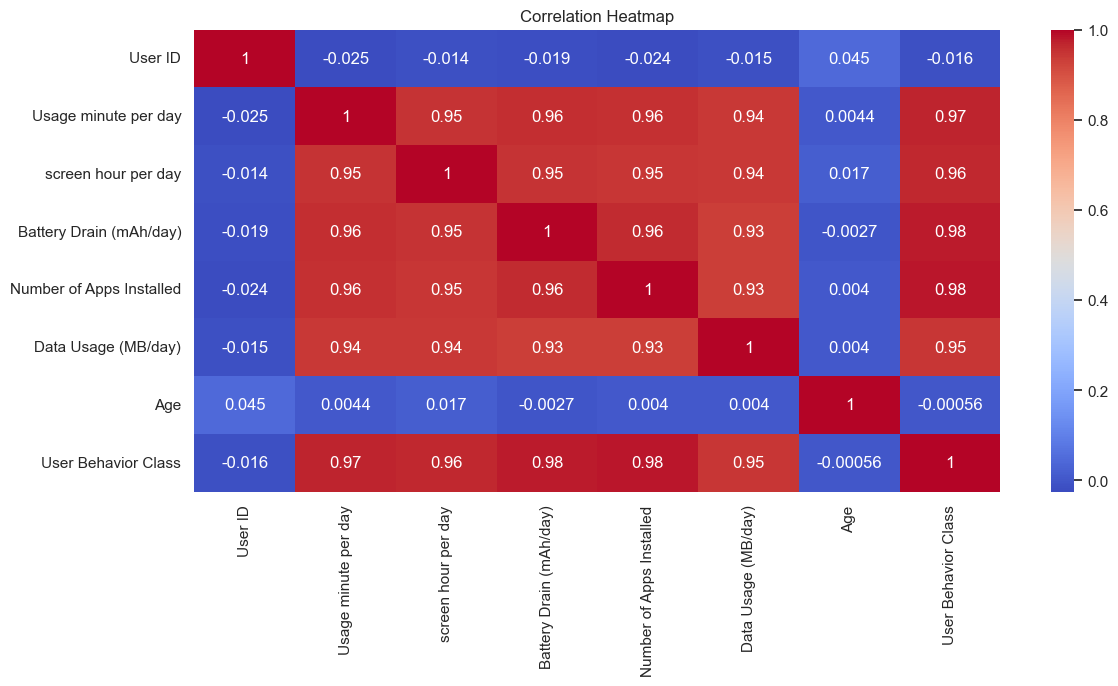

In [104]:
plt.figure(figsize=(13,6))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

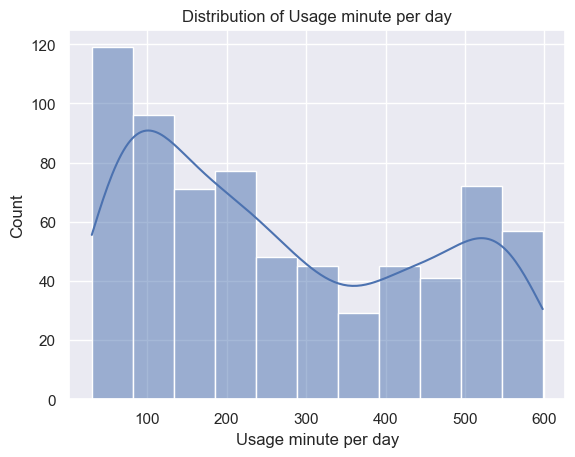

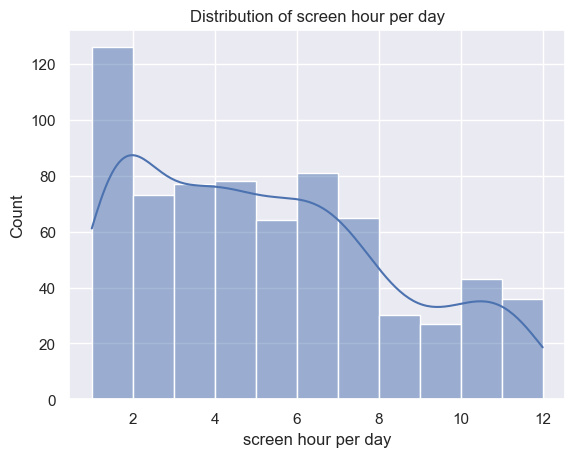

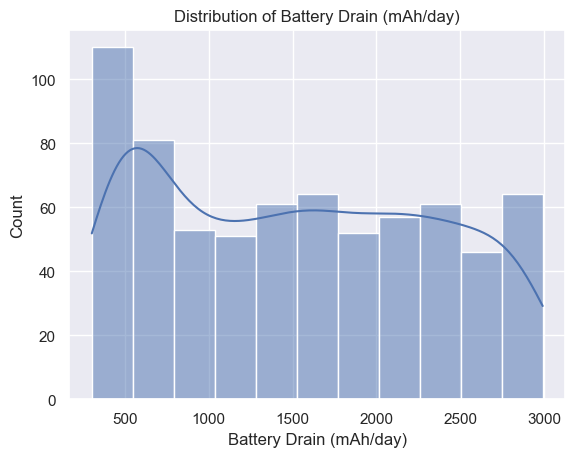

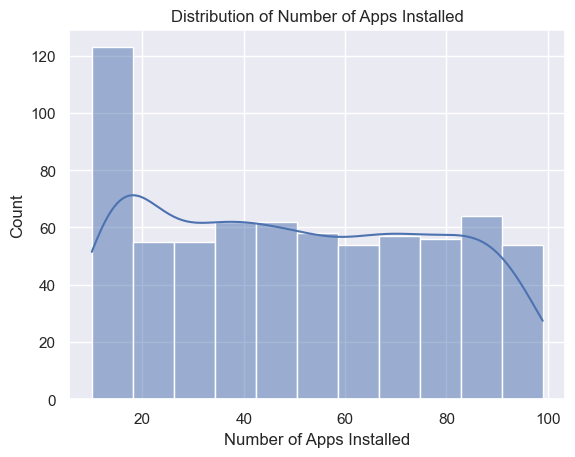

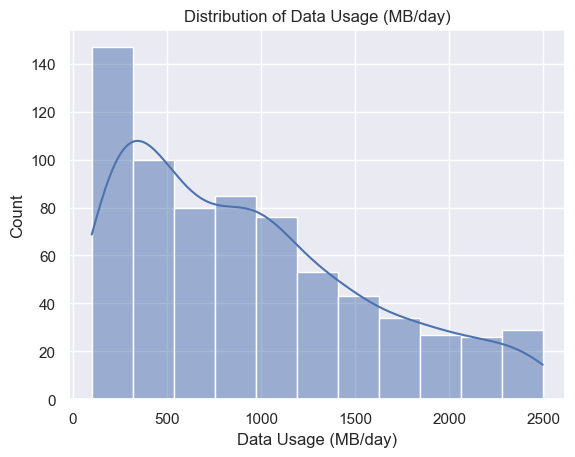

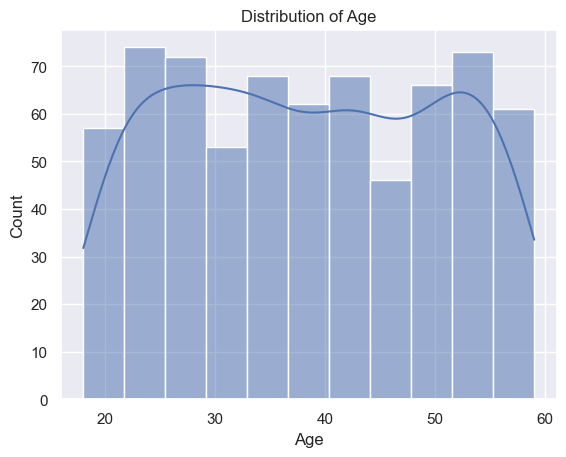

In [110]:
numerical_columns = ['Usage minute per day','screen hour per day','Battery Drain (mAh/day)','Number of Apps Installed','Data Usage (MB/day)','Age']
for column in numerical_columns:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


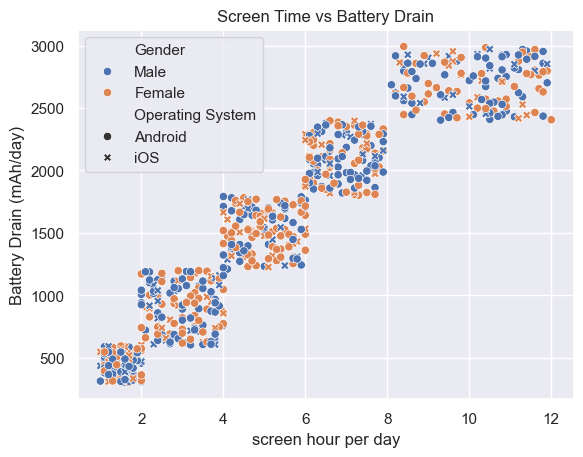

In [114]:
sns.scatterplot(data=df, x='screen hour per day', y='Battery Drain (mAh/day)', hue='Gender', style='Operating System')
plt.title('Screen Time vs Battery Drain')
plt.show()


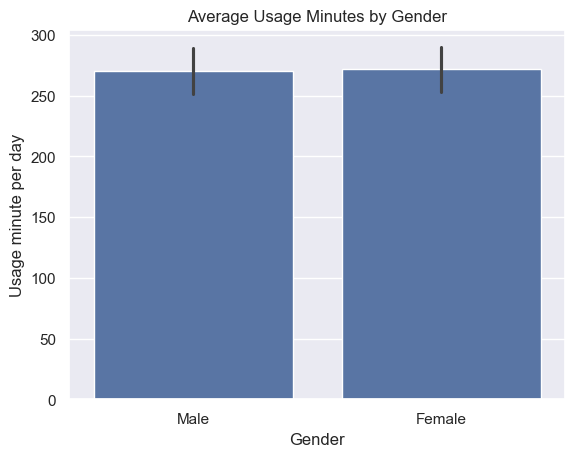

In [118]:
sns.barplot(data=df, x='Gender', y='Usage minute per day')
plt.title('Average Usage Minutes by Gender')
plt.show()


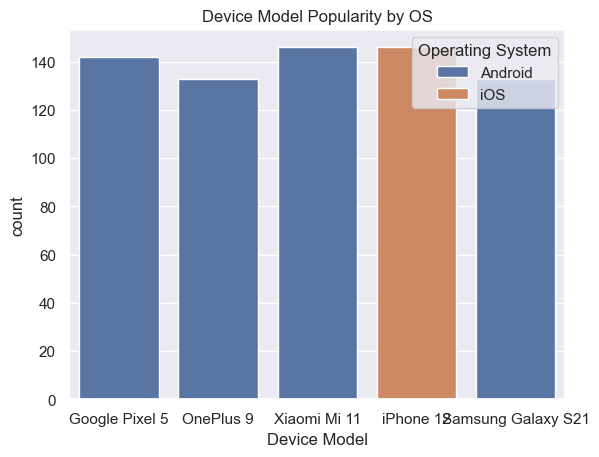

In [122]:
sns.countplot(data=df, x='Device Model', hue='Operating System')
plt.title('Device Model Popularity by OS')
plt.show()


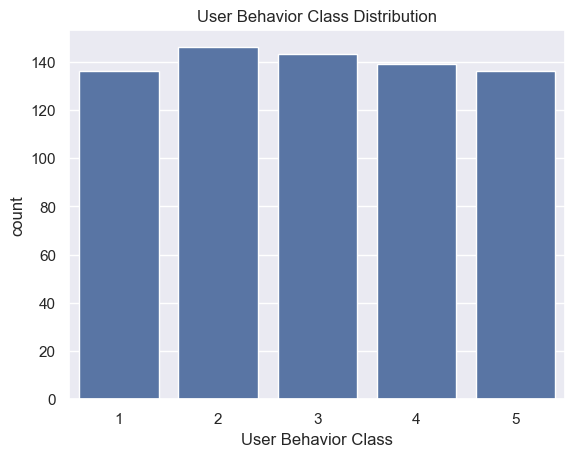

In [126]:
sns.countplot(data=df, x='User Behavior Class')
plt.title('User Behavior Class Distribution')
plt.show()


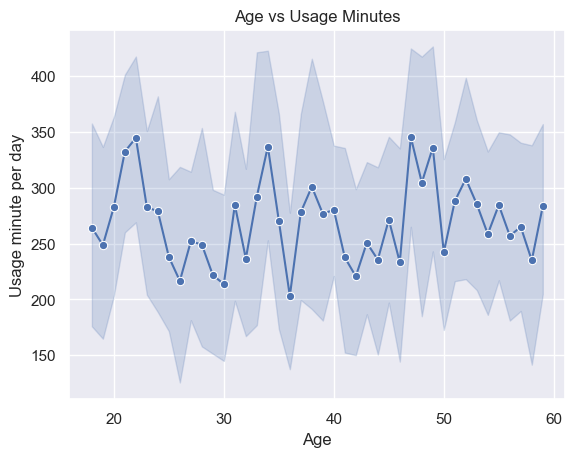

In [128]:
sns.lineplot(data=df, x='Age', y='Usage minute per day', marker='o')
plt.title('Age vs Usage Minutes')
plt.show()


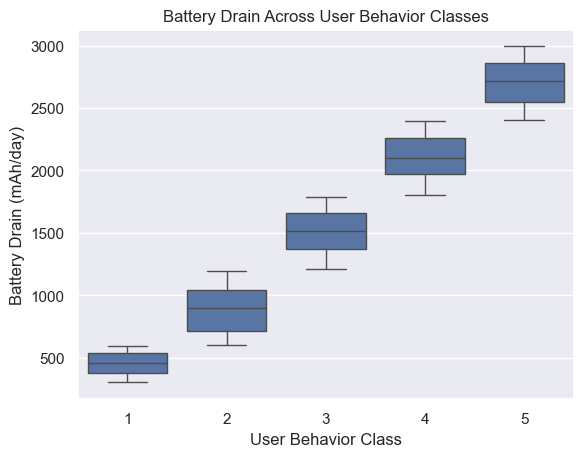

In [134]:
sns.boxplot(data=df, x='User Behavior Class', y='Battery Drain (mAh/day)')
plt.title('Battery Drain Across User Behavior Classes')
plt.show()


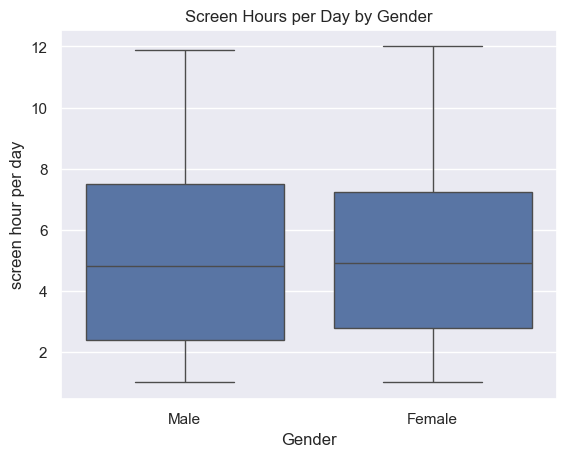

In [142]:
sns.boxplot(data=df, x='Gender', y='screen hour per day')
plt.title('Screen Hours per Day by Gender')
plt.show()


<Axes: xlabel='count', ylabel='Operating System'>

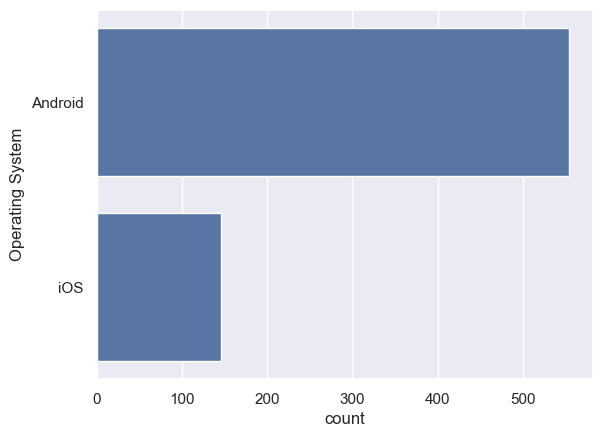

In [98]:
sns.countplot(df['Operating System'])

In [12]:
df['Gender'].value_counts()

Gender
Male      364
Female    336
Name: count, dtype: int64

<Axes: xlabel='Operating System', ylabel='count'>

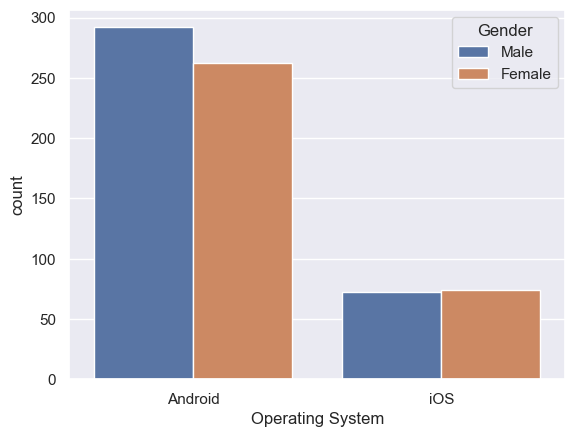

In [13]:
sns.countplot(x=df['Operating System'],hue=df['Gender'])

<Axes: xlabel='Operating System', ylabel='count'>

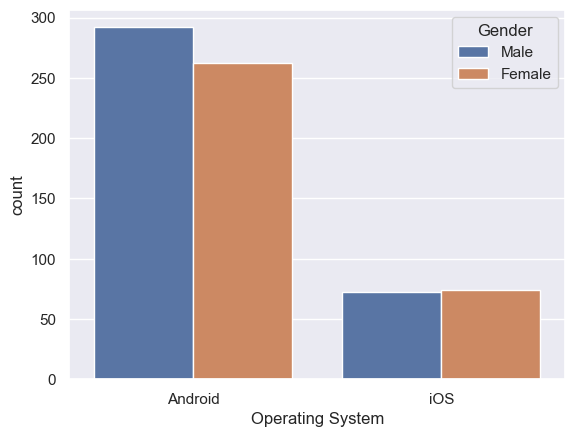

In [13]:
sns.countplot(x=df['Operating System'],hue=df['Gender'])

<Axes: xlabel='Device Model', ylabel='count'>

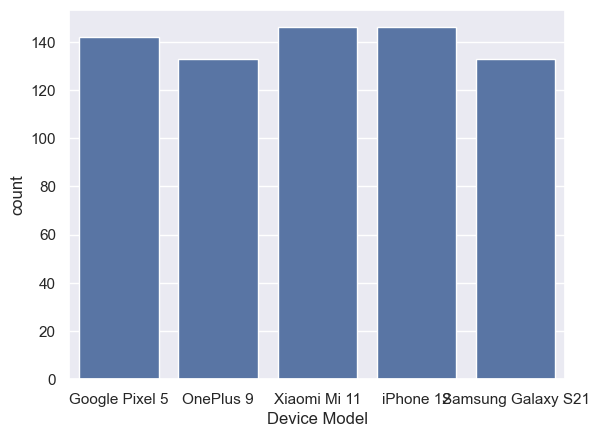

In [88]:
sns.countplot(x=df['Device Model'])

<Axes: xlabel='count', ylabel='count'>

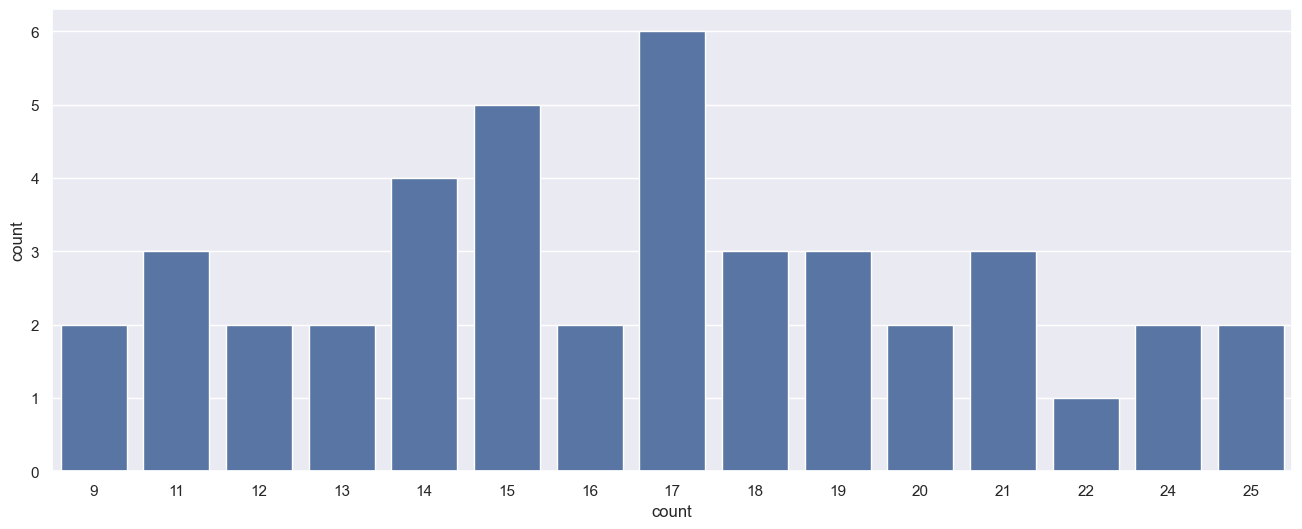

In [72]:
plt.figure(figsize=(16,6))
sns.countplot(x='Age',y='')


<Axes: xlabel='Operating System', ylabel='count'>

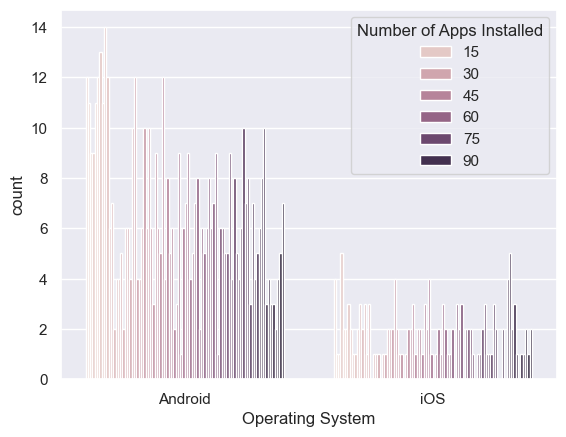

In [76]:
sns.countplot(x='Operating System',hue='Number of Apps Installed',data=df)

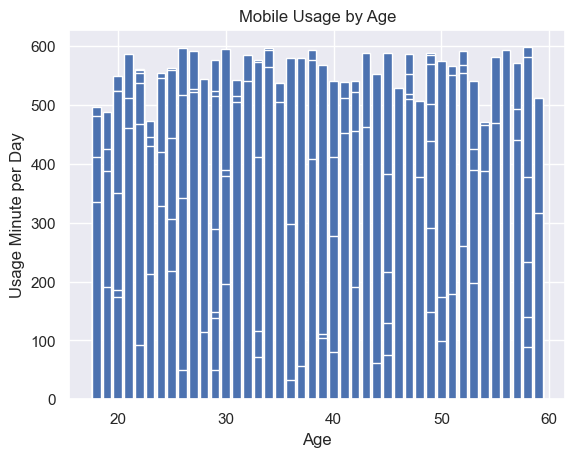

In [92]:
plt.bar(df['Age'], df['Usage minute per day'])
plt.xlabel('Age')
plt.ylabel('Usage Minute per Day')
plt.title('Mobile Usage by Age')
plt.show()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   User ID                   700 non-null    int64   
 1   Device Model              700 non-null    object  
 2   Operating System          700 non-null    object  
 3   Usage minute per day      700 non-null    int64   
 4   screen hour per day       700 non-null    float64 
 5   Battery Drain (mAh/day)   700 non-null    int64   
 6   Number of Apps Installed  700 non-null    int64   
 7   Data Usage (MB/day)       700 non-null    int64   
 8   Age                       700 non-null    int64   
 9   Gender                    700 non-null    object  
 10  User Behavior Class       700 non-null    int64   
 11  Age Group                 541 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 61.2+ KB


In [166]:
df_encoded=pd.get_dummies(df,columns=['Device Model', 'Operating System', 'Gender'],dtype=int)

In [168]:
df_encoded

,User ID,Usage minute per day,screen hour per day,Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Age Group,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,1,393,6.4,1872,67,1122,40,4,30-40,1,0,0,0,0,1,0,0,1
1,2,268,4.7,1331,42,944,47,3,40-50,0,1,0,0,0,1,0,1,0
2,3,154,4.0,761,32,322,42,2,40-50,0,0,0,1,0,1,0,0,1
3,4,239,4.8,1676,56,871,20,3,<20,1,0,0,0,0,1,0,0,1
4,5,187,4.3,1367,58,988,31,3,30-40,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,20-30,0,0,0,0,1,0,1,0,1
696,697,316,6.8,1965,68,1201,59,4,NaN,0,0,0,1,0,1,0,0,1
697,698,99,3.1,942,22,457,50,2,40-50,1,0,0,0,0,1,0,1,0
698,699,62,1.7,431,13,224,44,1,40-50,0,0,1,0,0,1,0,0,1


In [174]:
df_encoded.drop(columns='Age Group',inplace=True,index=1)

In [176]:
df_encoded

,User ID,Usage minute per day,screen hour per day,Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,1,393,6.4,1872,67,1122,40,4,1,0,0,0,0,1,0,0,1
2,3,154,4.0,761,32,322,42,2,0,0,0,1,0,1,0,0,1
3,4,239,4.8,1676,56,871,20,3,1,0,0,0,0,1,0,0,1
4,5,187,4.3,1367,58,988,31,3,0,0,0,0,1,0,1,1,0
5,6,99,2.0,940,35,564,31,2,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,92,3.9,1082,26,381,22,2,0,0,0,0,1,0,1,0,1
696,697,316,6.8,1965,68,1201,59,4,0,0,0,1,0,1,0,0,1
697,698,99,3.1,942,22,457,50,2,1,0,0,0,0,1,0,1,0
698,699,62,1.7,431,13,224,44,1,0,0,1,0,0,1,0,0,1


In [178]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          699 non-null    int64  
 1   Usage minute per day             699 non-null    int64  
 2   screen hour per day              699 non-null    float64
 3   Battery Drain (mAh/day)          699 non-null    int64  
 4   Number of Apps Installed         699 non-null    int64  
 5   Data Usage (MB/day)              699 non-null    int64  
 6   Age                              699 non-null    int64  
 7   User Behavior Class              699 non-null    int64  
 8   Device Model_Google Pixel 5      699 non-null    int32  
 9   Device Model_OnePlus 9           699 non-null    int32  
 10  Device Model_Samsung Galaxy S21  699 non-null    int32  
 11  Device Model_Xiaomi Mi 11        699 non-null    int32  
 12  Device Model_iPhone 12     

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
MM_scaler=MinMaxScaler()

In [196]:
numerical_columns = ['Usage minute per day', 'screen hour per day','Battery Drain (mAh/day)','Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

In [198]:
df_normalize = df_encoded.copy() 
df_normalize[numerical_columns] = MM_scaler.fit_transform(df_encoded[numerical_columns])


In [202]:
print("\nNormalized DataFrame:")
df_normalize.head()


Normalized DataFrame:


,User ID,Usage minute per day,screen hour per day,Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS,Gender_Female,Gender_Male
0,1,0.639085,0.490909,0.583426,0.640449,0.425887,0.536585,4,1,0,0,0,0,1,0,0,1
2,3,0.218310,0.272727,0.170569,0.247191,0.091858,0.585366,2,0,0,0,1,0,1,0,0,1
3,4,0.367958,0.345455,0.510591,0.516854,0.321086,0.048780,3,1,0,0,0,0,1,0,0,1
4,5,0.276408,0.300000,0.395764,0.539326,0.369937,0.317073,3,0,0,0,0,1,0,1,1,0
5,6,0.121479,0.090909,0.237087,0.280899,0.192902,0.317073,2,1,0,0,0,0,1,0,0,1
